In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

pd.options.mode.chained_assignment = None # removing some warnings when I try to rename a column values in pandas
warnings.filterwarnings('ignore')

In [82]:
products_df = pd.read_csv(r'C:\Users\mta6ca\Documents\BoschFiles\Senai-University-Files\2023.2\Big Data e IA\FormativeExercise\dados_produtos.csv')
products_df

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
...,...,...,...,...
95,iPod,4.44,1372,0
96,Celular,4.66,1690,1
97,Televisão,4.33,3364,1
98,Notebook,3.30,1825,1


In [83]:
products_df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [84]:
products_df.tail()

,product_name,rating,rating_count,purchased
95,iPod,4.44,1372,0
96,Celular,4.66,1690,1
97,Televisão,4.33,3364,1
98,Notebook,3.30,1825,1
99,iPod,4.08,533,0


In [85]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [86]:
products_df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


<Axes: xlabel='product_name', ylabel='rating'>

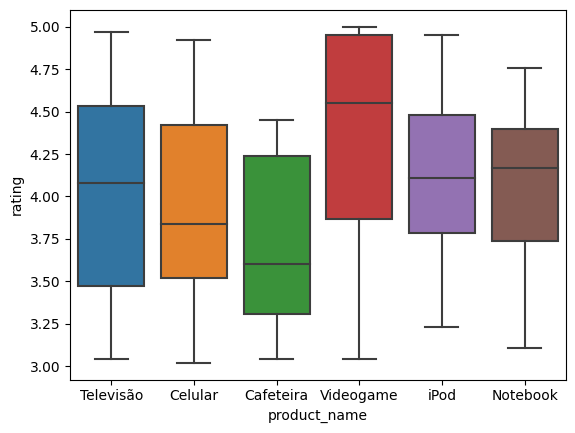

In [87]:
sns.boxplot(x='product_name', y='rating', data=products_df)

In [88]:
products_df.dropna(inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn import tree


---------------------------Árvore de Decisão do Produto Televisão---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
Confusion Matrix: [[1 0]
 [2 1]]

Visualização da Árvore:

---------------------------Árvore de Decisão do Produto Celular---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
Confusion Matrix: [[1 2]
 [0 2]]

Visualização da Árvore:

---------------------------Árvore de Decisão do Produto Cafeteira---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 0]
 [1 0]]

Visualização da Árvore:

---------------------------Árvore de Decisão do Produto Videogame---------------------------------

Avaliação do Modelo: 

Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Confusion 

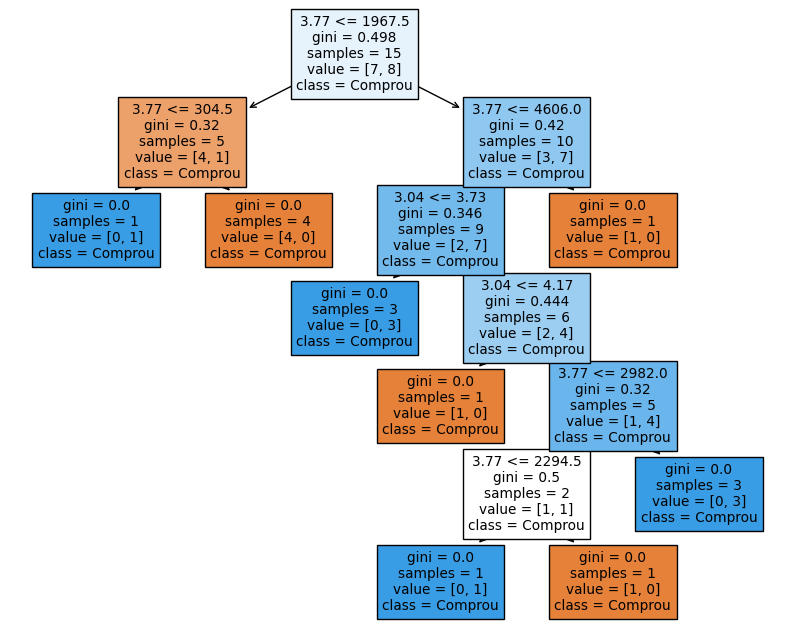

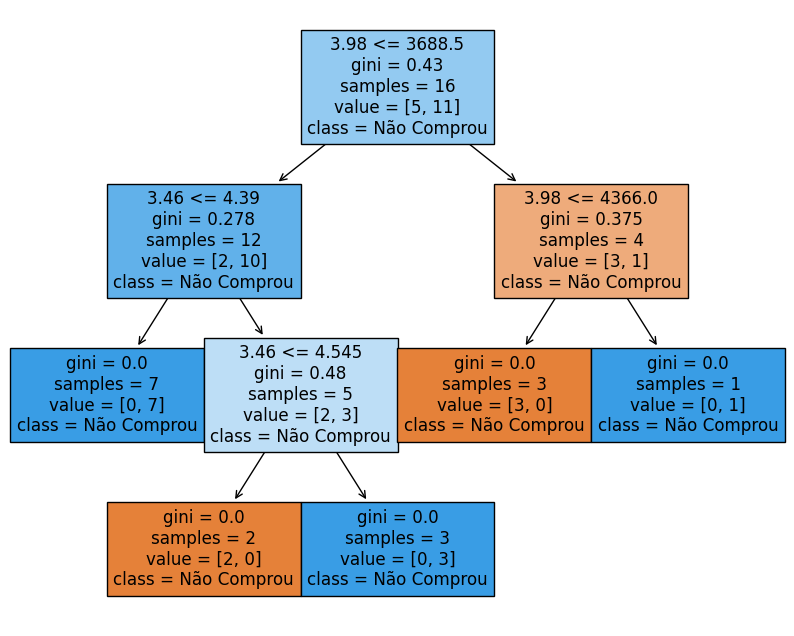

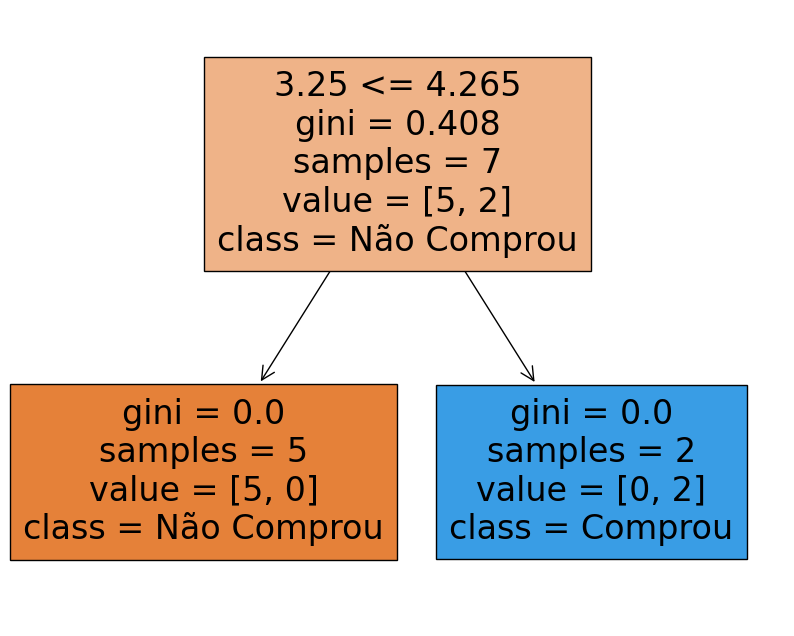

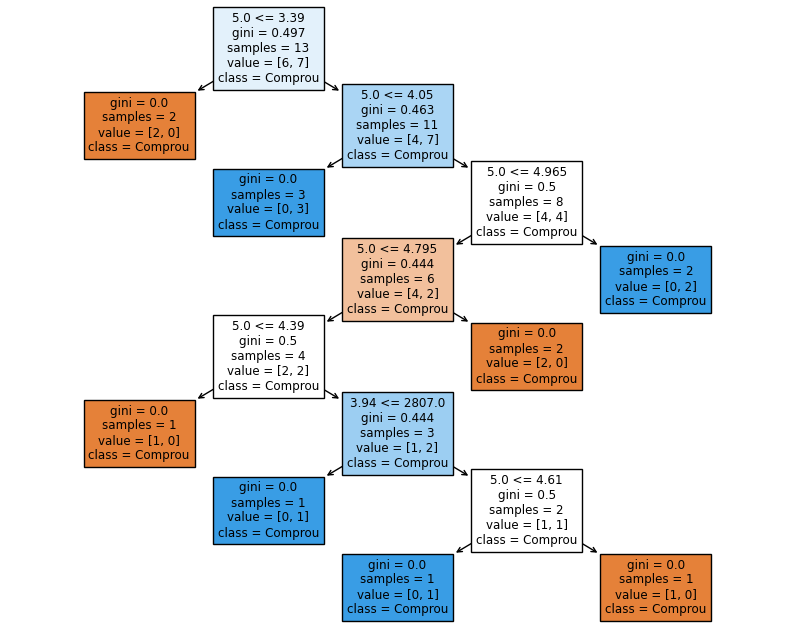

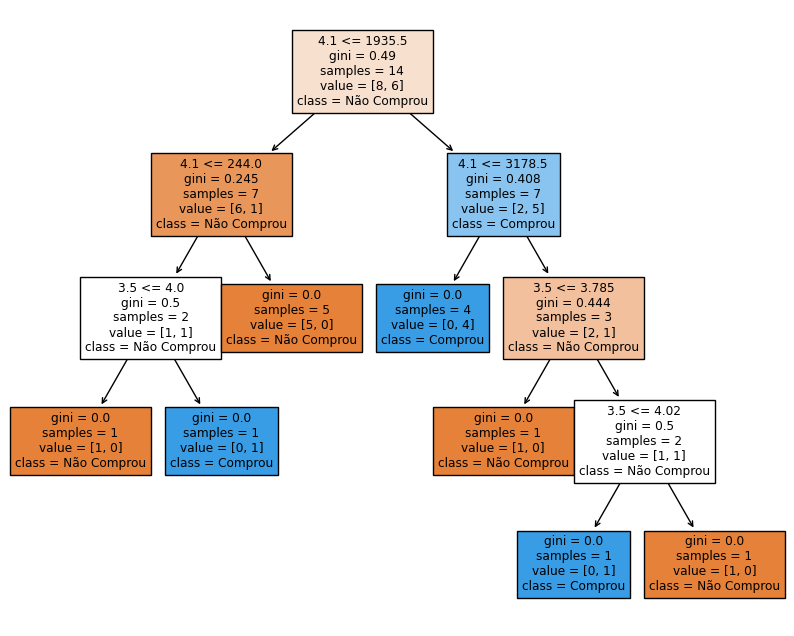

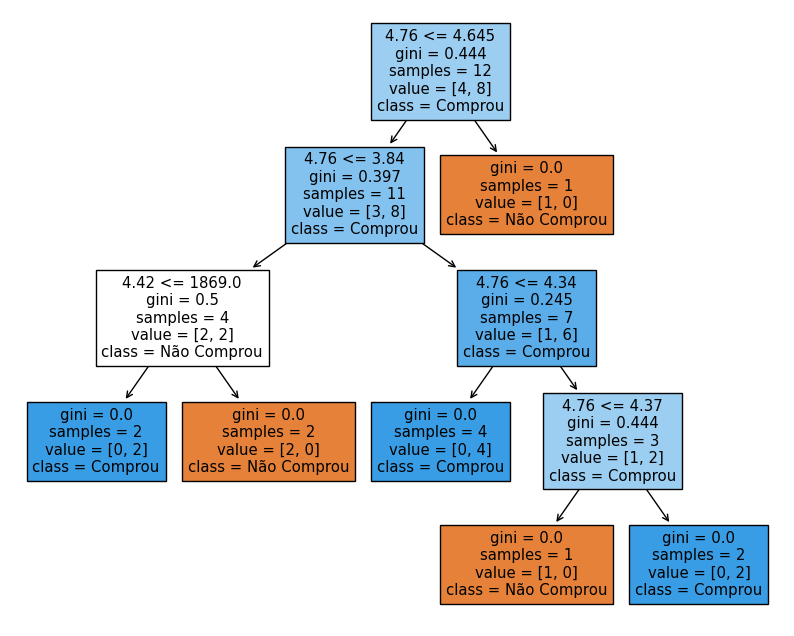

In [90]:
products = products_df['product_name'].unique()

for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = products_df.loc[products_df['product_name'] == product]

    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']

    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

    print('\nVisualização da Árvore:')

    product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])

    fig = plt.figure(figsize=(10, 8))
    tree.plot_tree(model, feature_names=product_df['rating'].tolist(), class_names=product_df['purchased'].tolist(), filled=True)


Português

Podemos dizer com absoluta certeza que as árvores de decisão, não são eficazes para prever se um usuário comprou ou não um produto, já que nós não nos baseamos apenas na nota, mas também na quantidade de avaliações presentes, sendo problemático na hora de correlacionar os dados

English

We can say with absolutely sure that, the decision trees are not efficient to predict if a user buy or not a product, considering that, we don't only look to the rating, but too to the rating count, having a trouble to correlate the data